In [1]:
import numpy as np

import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

d:\python3.6.8\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
d:\python3.6.8\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
d:\python3.6.8\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


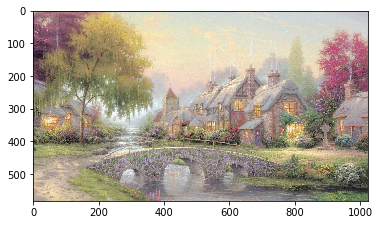

In [3]:
image = plt.imread('./欧式.jpg')
plt.imshow(image)

In [4]:
image.shape

(582, 1024, 3)

In [5]:
image.dtype

dtype('uint8')

(1, 582, 1024, 1)


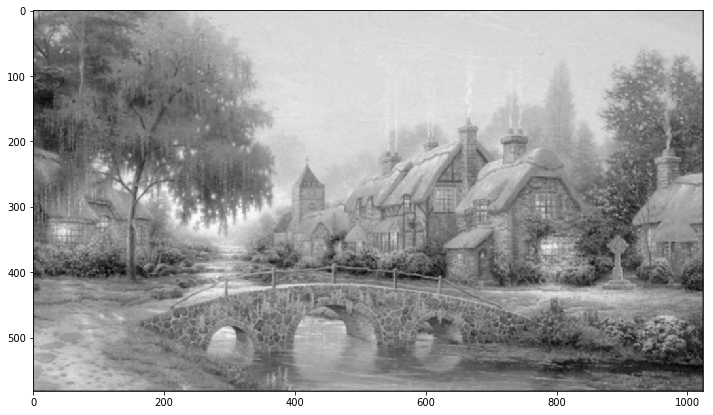

In [10]:
# [filter_height, filter_width, in_channels, out_channels]
filter_ = np.full(shape = [3,3,3,1],fill_value=1/27).reshape(3,3,3,1) 

conv = tf.nn.conv2d(input = image.reshape(1,582,1024,3).astype(np.float32),filter=filter_,strides=[1,1,1,1],padding="SAME")

with tf.Session() as sess:
    ret = sess.run(conv)
    print(ret.shape)
    
    plt.figure(figsize=(12,9))
    plt.imshow(ret.reshape(582,1024),cmap = 'gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 582, 1024, 3)


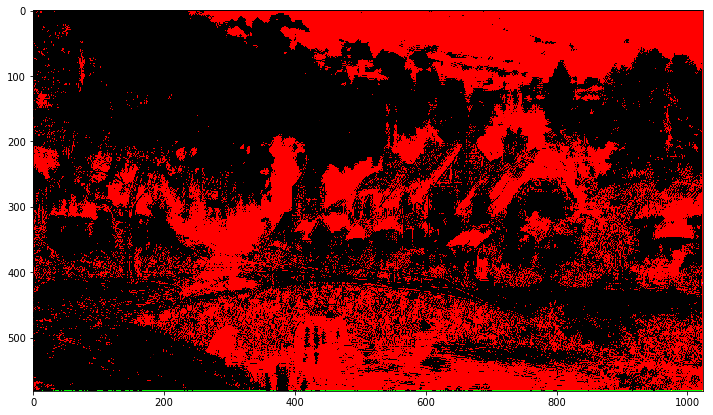

In [18]:
filter_ = np.random.normal(loc = 1/27,size = (3,3,3,3))

conv = tf.nn.conv2d(input = image.reshape(1,582,1024,3).astype(np.float32),filter=filter_,strides=[1,1,1,1],padding="SAME")

with tf.Session() as sess:
    ret = sess.run(conv)
    print(ret.shape)
    
    plt.figure(figsize=(12,9))
    plt.imshow(ret.reshape(582,1024,3))
#     print(ret)

In [19]:
image = np.transpose(image,axes = [2,0,1])
image.shape

(3, 582, 1024)

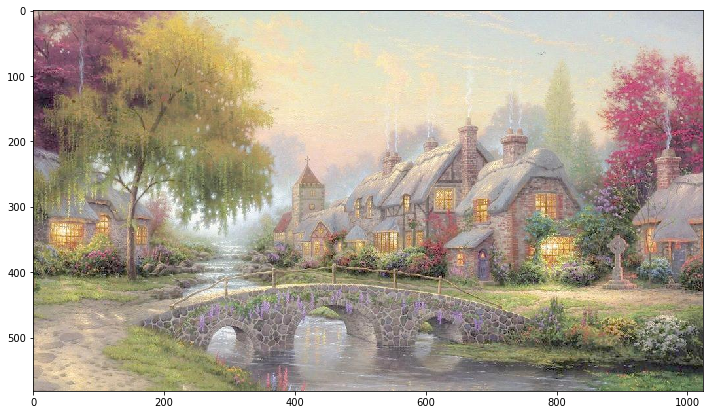

In [24]:
plt.figure(figsize=(12,9))
plt.imshow(plt.imread('./欧式.jpg'))

(3, 582, 1024, 1)


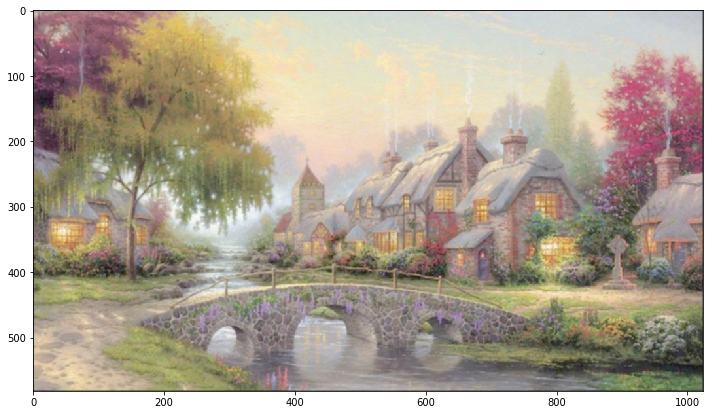

In [23]:


filter_ = np.full(shape = [3,3],fill_value=1/9).reshape(3,3,1,1)

conv = tf.nn.conv2d(input = image.reshape(3,582,1024,1).astype(np.float32),filter=filter_,strides=[1,1,1,1],padding="SAME")

with tf.Session() as sess:
    ret = sess.run(conv)
    print(ret.shape)
    
    plt.figure(figsize=(12,9))
    plt.imshow(ret.reshape(3,582,1024).transpose([1,2,0]).astype(np.uint8))

In [27]:
bridge = plt.imread('./欧式.jpg')[380:520,180:780]

(3, 582, 1024, 1)


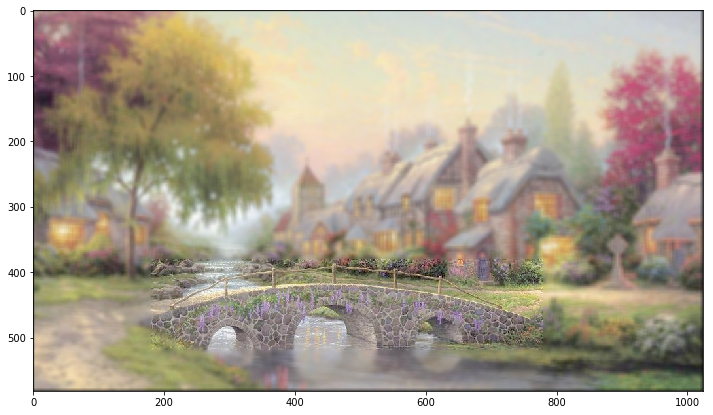

In [29]:
filter_ = np.full(shape = [8,8],fill_value=1/64).reshape(8,8,1,1)

conv = tf.nn.conv2d(input = image.reshape(3,582,1024,1).astype(np.float32),filter=filter_,strides=[1,1,1,1],padding="SAME")

with tf.Session() as sess:
    ret = sess.run(conv)
    print(ret.shape)
    
    plt.figure(figsize=(12,9))
    img = ret.reshape(3,582,1024).transpose([1,2,0]).astype(np.uint8)
    
    img[380:520,180:780] = bridge
    plt.imshow(img)

In [31]:
image

array([[[199, 195, 201, ..., 189, 191, 193],
        [203, 198, 196, ..., 186, 187, 189],
        [197, 197, 189, ..., 186, 186, 187],
        ...,
        [185, 182, 179, ...,  92,  90,  88],
        [178, 174, 171, ...,  91,  89,  89],
        [171, 166, 162, ...,  96,  95,  97]],

       [[155, 154, 164, ..., 195, 197, 199],
        [159, 157, 159, ..., 192, 193, 195],
        [156, 157, 154, ..., 192, 192, 193],
        ...,
        [173, 170, 166, ..., 112, 110, 108],
        [166, 162, 158, ..., 111, 109, 109],
        [159, 154, 149, ..., 116, 115, 117]],

       [[152, 150, 158, ..., 211, 213, 215],
        [156, 153, 153, ..., 208, 209, 211],
        [154, 155, 150, ..., 206, 206, 207],
        ...,
        [161, 158, 158, ...,  75,  73,  71],
        [154, 150, 150, ...,  74,  72,  72],
        [147, 142, 141, ...,  79,  78,  80]]], dtype=uint8)

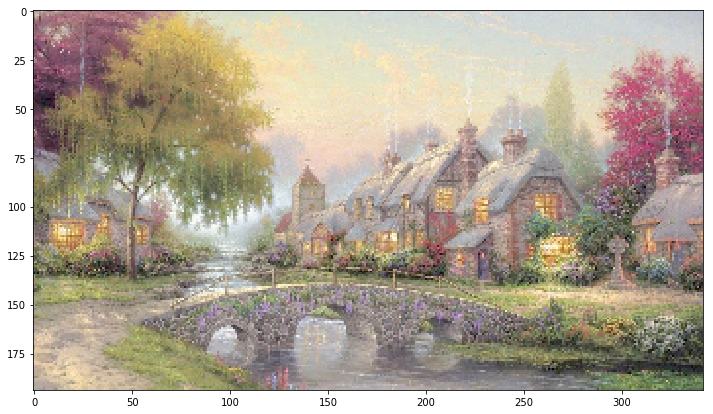

In [36]:
plt.figure(figsize=(12,9))
plt.imshow(image.transpose(1,2,0)[::3,::3])